In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv


# Pre-Processing


In [2]:
import pandas as pd

# Load the dataset
file_path = "/kaggle/input/titanic/train_and_test2.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

(None,
    Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
 0            1  22.0   7.2500    0      1     0       0       0       0   
 1            2  38.0  71.2833    1      1     0       0       0       0   
 2            3  26.0   7.9250    1      0     0       0       0       0   
 3            4  35.0  53.1000    1      1     0       0       0       0   
 4            5  35.0   8.0500    0      0     0       0       0       0   
 
    zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
 0       0  ...        0        0        0       3        0        0       2.0   
 1       0  ...        0        0        0       1        0        0       0.0   
 2       0  ...        0        0        0       3        0        0       2.0   
 3       0  ...        0        0        0       1        0        0       2.0   
 4       0  ...        0        0        0       3        0        0       2.0   
 
    zero.17  zero.18  2urvived  
 0      

In [3]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Passengerid"] + [col for col in df.columns if "zero" in col])

# Rename the target column
df_cleaned.rename(columns={"2urvived": "Survived"}, inplace=True)

# Fill missing values in Embarked with the most common value
df_cleaned["Embarked"].fillna(df_cleaned["Embarked"].mode()[0], inplace=True)

# Display cleaned dataset info
df_cleaned.info(), df_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Embarked  1309 non-null   float64
 7   Survived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


<ipython-input-3-4ccbcbb1874a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Embarked"].fillna(df_cleaned["Embarked"].mode()[0], inplace=True)


(None,
     Age     Fare  Sex  sibsp  Parch  Pclass  Embarked  Survived
 0  22.0   7.2500    0      1      0       3       2.0         0
 1  38.0  71.2833    1      1      0       1       0.0         1
 2  26.0   7.9250    1      0      0       3       2.0         1
 3  35.0  53.1000    1      1      0       1       2.0         1
 4  35.0   8.0500    0      0      0       3       2.0         0)

# Applying Logistic Regression

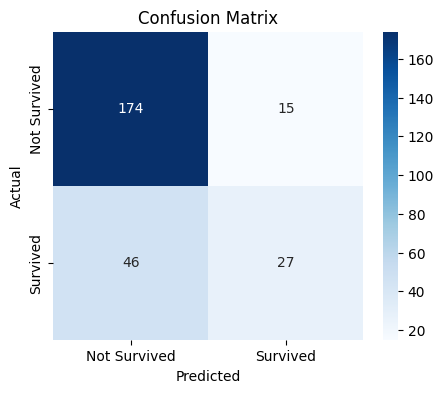

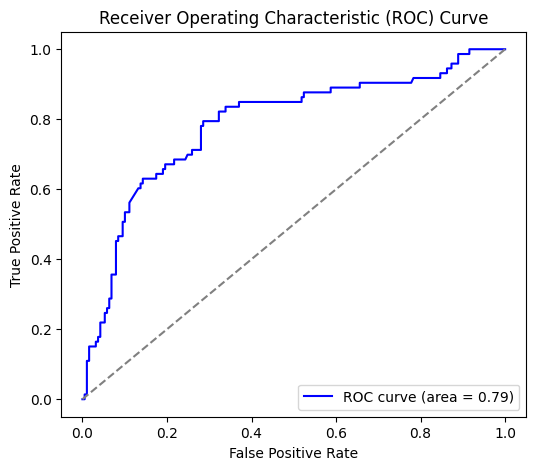

(0.767175572519084,
 0.6428571428571429,
 0.3698630136986301,
 0.46956521739130436,
 0.7860404435746902)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df_cleaned.drop(columns=["Survived"])
y = df_cleaned["Survived"]

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Output evaluation metrics
accuracy, precision, recall, f1, roc_auc
